### Data collection
Run once for every class
(dataset already on github, do not run again)

In [ ]:
# from selenium import webdriver
# from sys import stdout
# import math
# import os
# import time
# from urllib.request import urlretrieve

# def scroll_to_end(driver, scroll_point):  
#     driver.execute_script(f"window.scrollTo(0,{scroll_point});")
#     time.sleep(.3)

# def get_images(query, max_urls, driver, max_iters=500):
#     search_url = f"https://unsplash.com/s/photos/{query}"
#     urls = set()
#     img_count = 0
#     i = 1

#     #load page
#     driver.get(search_url)
#     time.sleep(2)
    
#     while(True):
#         i = i + 1
#         if img_count >= max_urls or i >= max_iters:
#             break
#         # scroll to load more images
#         scroll_to_end(driver, i*1500)

#         imgs = driver.find_elements_by_css_selector("img._2UpQX")
#         # get src from elements and add to urls set 
#         urls.update(map(lambda x: x.get_attribute("src"), imgs))
#         img_count = len(urls)
#         # get urls added amount limited to the max_urls for printing
#         added = max_urls if img_count > max_urls else img_count
#         stdout.write("\rURLs added: [%s / %s] - iter(%s)" % (added, max_urls, i))
#         stdout.flush()
        
#     stdout.write("\n")
#     stdout.flush()
#     # remove extra urls
#     if img_count > max_urls:
#         extra = img_count - max_urls
#         for i in range(0,extra):
#             urls.pop()

#     return urls, added

# driver = webdriver.Chrome()

# q = input('Enter the search term: ')
# start = time.time()
# urls, count = get_images(q, 2000, driver)
# print(f"Done. {count} images retrieved.")

# driver.close()

# urlsList = list(urls)
# limit = math.floor(count*.8)
# trainSetTemp = urlsList[:limit]
# testSet = urlsList[limit:]

# limit = math.floor(len(trainSetTemp)*.8)
# trainSet = trainSetTemp[:limit]
# validSet = trainSetTemp[limit:]

# def addImages(trainSet, testSet, validSet):
#     print("Downloading images...")
#     if not os.path.isdir('act_integradora3/dataset/train/{}'.format(q)):
#         os.makedirs('act_integradora3/dataset/train/{}'.format(q))
#         for trainUrlIndex in range(len(trainSet)):
#             urlretrieve(trainSet[trainUrlIndex], 'act_integradora3/dataset/train/{}/{}{}.jpg'.format(q, q, trainUrlIndex))
#         print(f"{len(trainSet)} images downloaded for training set")
#     if not os.path.isdir('act_integradora3/dataset/test/{}'.format(q)):
#         os.makedirs('act_integradora3/dataset/test/{}'.format(q))
#         for testUrlIndex in range(len(testSet)):
#             urlretrieve(testSet[testUrlIndex], 'act_integradora3/dataset/test/{}/{}{}.jpg'.format(q, q, testUrlIndex))
#         print(f"{len(testSet)} images downloaded for testing set")
#     if not os.path.isdir('act_integradora3/dataset/valid/{}'.format(q)):
#         os.makedirs('act_integradora3/dataset/valid/{}'.format(q))
#         for validUrlIndex in range(len(validSet)):
#             urlretrieve(validSet[validUrlIndex], 'act_integradora3/dataset/valid/{}/{}{}.jpg'.format(q, q, validUrlIndex))
#         print(f"{len(validSet)} images downloaded for validation set")

# addImages(trainSet, testSet, validSet)
# end = time.time()
# print(f"finished in {end - start} seconds")

### Import dataset

In [ ]:
import zipfile
import os

In [ ]:
!wget --no-check-certificate \
    "https://github.com/diegomtzm/actIntegradora3/archive/refs/heads/main.zip" \
    -O "/tmp/dataset.zip"


zip_ref = zipfile.ZipFile('/tmp/dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

### Data augmentation sample

In [33]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
import matplotlib.pyplot as plt 
%matplotlib inline

In [34]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [35]:
def augment(image_path, datagen):
    image = np.expand_dims(plt.imread(image_path), 0)
    plt.imshow(image[0])

    aug_iter = datagen.flow(image)
    aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

    plotImages(aug_images)

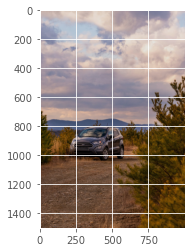

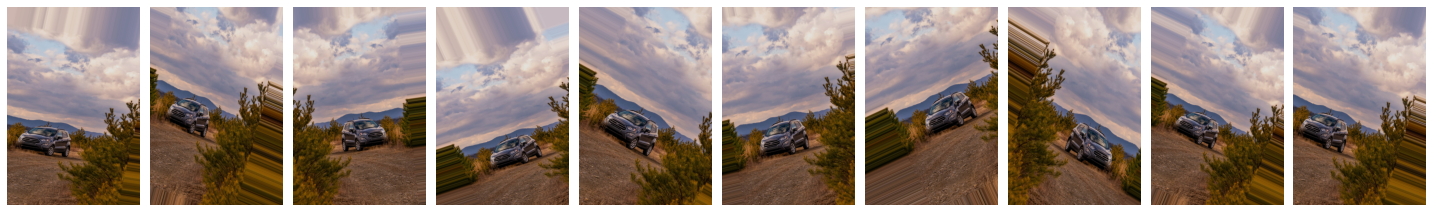

In [36]:
datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

chosen_image = random.choice(os.listdir('actIntegradora3-main/dataset/train/car'))
image_path = 'actIntegradora3-main/dataset/train/car/' + chosen_image
augment(image_path, datagen)

###Data augmentation and preprocessing

In [37]:
train_path = 'actIntegradora3-main/dataset/train'
test_path = 'actIntegradora3-main/dataset/test'
valid_path = 'actIntegradora3-main/dataset/valid'

In [38]:
gen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [39]:
train_batches = gen.flow_from_directory(directory=train_path, target_size=(224,224), classes=['airplane', 'bike', 'bus', 'car', 'train'], batch_size=10)
valid_batches = gen.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['airplane', 'bike', 'bus', 'car', 'train'], batch_size=10)
test_batches = gen.flow_from_directory(directory=test_path, target_size=(224,224), classes=['airplane', 'bike', 'bus', 'car', 'train'], batch_size=10, shuffle=False)

Found 6400 images belonging to 5 classes.
Found 1600 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

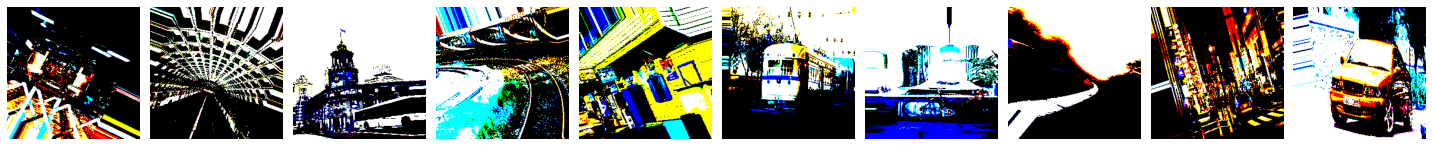

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [40]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

### Transfer Learning

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [42]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [43]:
vgg16_seq_model = Sequential()
for layer in vgg16_model.layers[:-1]:
    vgg16_seq_model.add(layer)

In [44]:
for layer in vgg16_seq_model.layers:
    layer.trainable = False

In [45]:
vgg16_seq_model.add(Dense(units=5, activation='softmax'))

In [46]:
vgg16_seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

#### Other models

In [47]:
# InceptionV3_model = keras.applications.inception_v3.InceptionV3()
# InceptionV3_model.summary()

In [48]:
# ResNet50_model = keras.applications.resnet50.ResNet50()
# ResNet50_model.summary()

### Model training

In [49]:
vgg16_seq_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
H=vgg16_seq_model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
640/640 - 528s - loss: 0.8053 - accuracy: 0.6844 - val_loss: 0.6019 - val_accuracy: 0.7613
Epoch 2/5
640/640 - 519s - loss: 0.5450 - accuracy: 0.7892 - val_loss: 0.5487 - val_accuracy: 0.7769
Epoch 3/5
640/640 - 520s - loss: 0.5078 - accuracy: 0.8000 - val_loss: 0.5160 - val_accuracy: 0.7931
Epoch 4/5
640/640 - 518s - loss: 0.4754 - accuracy: 0.8122 - val_loss: 0.5106 - val_accuracy: 0.8087
Epoch 5/5
640/640 - 521s - loss: 0.4660 - accuracy: 0.8181 - val_loss: 0.5085 - val_accuracy: 0.8081


### Model evaluation

In [51]:
from sklearn.metrics import confusion_matrix
import itertools

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
def plot_training(H, N):
  # construct a plot that plots and saves the training history
	plt.style.use("ggplot")
	plt.figure()
	plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
	plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
	plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
	plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
	plt.title("Training Loss and Accuracy")
	plt.xlabel("Epoch #")
	plt.ylabel("Loss/Accuracy")
	plt.legend(loc="lower left")

In [54]:
predictions = vgg16_seq_model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [55]:
#save model
vgg16_seq_model.save('modeloKeras.h5')

Confusion matrix, without normalization
[[387   3   4   1   5]
 [ 10 342  21  11  16]
 [  8  23 269  52  48]
 [ 10  36  86 249  19]
 [  4   5  30  13 348]]


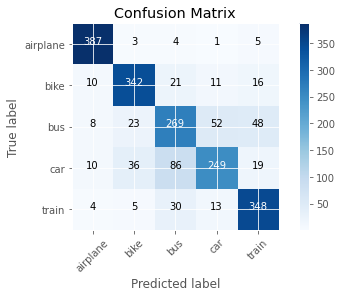

In [58]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['airplane', 'bike', 'bus', 'car', 'train']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

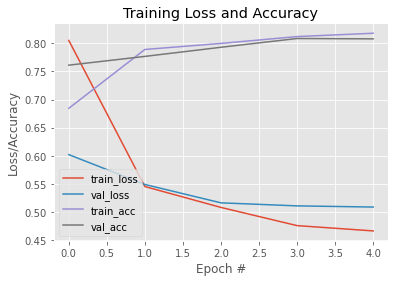

In [61]:
plot_training(H,5)